# Experiment 1: Synthetic data
This notebook compares the accuracy and the wall clock time for various GP ensemble methods

In [1]:
import numpy as np
import matplotlib.pyplot as plt

d = 5                   # input space dimension
n = 2**4 * 4**d         # number of observation points
p = 4**d                # number of submodels

# The lines below are specific to the notebook format
%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 6)
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 150em; }</style>"));


In [2]:
npzfile = np.load(f"exp1:d_{d}-n_{n}-p_{p}.npz")
TIME = npzfile["TIME"]
NLPD = npzfile["NLPD"]
method_name = npzfile["method_name"]

num_models = len(method_name)

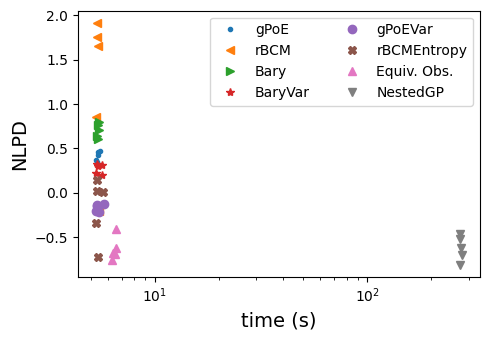

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))
plt.gca().set_prop_cycle(marker=['.', '<', '>', '*', 'o', 'X', '^', 'v']) # gca()=current axis

j = -1
for i in range(num_models):
    if i not in [0, 2]:
        j += 1
        plt.plot(TIME[:, i], NLPD[:, i], linestyle="", color=f"C{j}", label=method_name[i])

        

plt.legend(ncol=2)
plt.xlabel('time (s)', fontsize=14)
plt.ylabel('NLPD', fontsize=14)
plt.semilogx()
plt.tight_layout()
plt.savefig(f"exp1:d_{d}-n_{n}-p_{p}.pdf")

In [4]:
np.mean(NLPD, axis=0)

array([ 3.20825377,  0.41075605,  3.20825377,  1.19653013,  0.70338353,
        0.27132682, -0.16947846, -0.1782887 , -0.63156627, -0.62359275])

In [5]:
method_name

array(['PoE', 'gPoE', 'BCM', 'rBCM', 'Bary', 'BaryVar', 'gPoEVar',
       'rBCMEntropy', 'Equiv. Obs.', 'NestedGP'], dtype='<U11')

In [9]:
np.mean(TIME, axis=0)

array([  5.37662468,   5.39826398,   5.43760614,   5.37559123,
         5.40974774,   5.46274486,   5.43547902,   5.42040157,
         6.46974635, 275.456323  ])

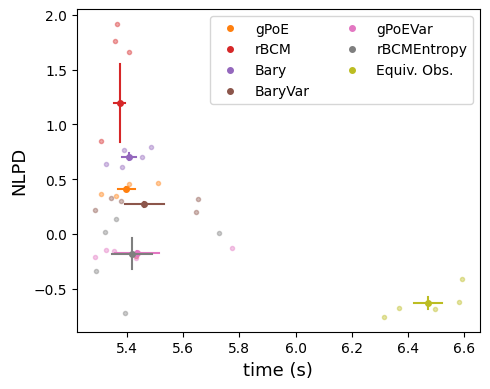

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))

for i in range(num_models):
    if i not in [0, 2, num_models-1]:
        plt.plot(TIME[:, i], NLPD[:, i], f"C{i}.", alpha=.4)

for i in range(num_models):
    if i not in [0, 2, num_models-1]:
        mean_t = np.mean(TIME[:, i])
        mean_n = np.mean(NLPD[:, i])
        std_t = np.std(TIME[:, i])
        std_n = np.std(NLPD[:, i])
        low_t = mean_t - std_t / np.sqrt(TIME.shape[0])
        upp_t = mean_t + std_t / np.sqrt(TIME.shape[0])
        low_n = mean_n - std_n / np.sqrt(TIME.shape[0])
        upp_n = mean_n + std_n / np.sqrt(TIME.shape[0])  
        plt.plot(mean_t, mean_n, f"C{i}o", ms=4., label=method_name[i])
        plt.plot((mean_t, mean_t), (low_n, upp_n), f"C{i}")
        plt.plot((low_t, upp_t), (mean_n, mean_n), f"C{i}")

plt.legend(ncol=2)
plt.xlabel('time (s)', fontsize=13)
plt.ylabel('NLPD', fontsize=13)
plt.tight_layout()
#plt.savefig(f"exp1:d_{d}-n_{n}-p_{p}.pdf")
